In [1]:
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister
from qiskit.visualization import *
from math import pi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generateBinaryStrings(ndim:int):
    res = ["0","1"]
    while len(res)<ndim:
        s = res.pop()
        res.insert(0,s+"1")
        res.insert(0,s+"0")

    return res

def getSymmetricPairs(bStringArray:list):
    pair_list = []
    tmp = []
    for s in bStringArray:
        tmp.append(s[::-1])
    d_tmp = bStringArray2DecArray(tmp)
    tmp2 = []
    
    for i in range(len(bStringArray)):
        if d_tmp[i]!=i and i not in tmp2:
            tmp2.append(i)
            tmp2.append(d_tmp[i])
    
    for i in range(len(tmp2)//2):
        pair_list.append([tmp2[2*i],tmp2[2*i+1]])
        
    return pair_list 

def bStringArray2DecArray(bArray:list):
    dArray =[]
    for s in bArray:
        l = len(s)
        res = 0
        for i in range(l):
            res += int(s[i])*2**(l-1-i)
        dArray.append(res)
    return dArray

def qiskitU2textU(unitary:np.ndarray):
    n,m=unitary.shape
    assert m==n
    exchange_pairs = getSymmetricPairs(generateBinaryStrings(n))
    for pair in exchange_pairs:
        reverse_pair = pair[::-1]
        unitary[pair] = unitary[reverse_pair]
        unitary[:,pair] = unitary[:,reverse_pair]
    return unitary

def debug_get_unitary(qc:QuantumCircuit):
    backend = Aer.get_backend("unitary_simulator")
    job = execute(qc, backend=backend)
    unitary = job.result().get_unitary()
    res_unitary = unitary
    TextUnitary = qiskitU2textU(unitary)
    norm = np.linalg.norm(np.trace(unitary))

    return TextUnitary, res_unitary, norm

# def purify(unitary:np.ndarray):

In [ ]:
def apply_H(qc, qres):
    qc.u(0,0,pi/2,qres)
    qc.u(pi/2, -pi/2, pi/2,qres)
    qc.u(0,0,pi/2,qres)
    return

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
textU, qiskitU,_ = debug_get_unitary(qc)

In [4]:
textUTruc = textU.real

In [5]:
targetU = np.array([[0,0,0,1]
                   ,[1,0,0,0]
                   ,[0,1,0,0]
                   ,[0,0,1,0]])

In [6]:
H = np.array([[1,1]
            ,[1,-1]])/np.sqrt(2)
CX = np.array([[1,0,0,0]
              ,[0,1,0,0]
              ,[0,0,0,1]
              ,[0,0,1,0]])
Z = np.array([[1,0]
            ,[0,-1]])
I = np.eye(2,2)

In [79]:
def construct_toffoli(qc:QuantumCircuit):
    qc.p(pi/2,2)
    qc.u(pi/2, -pi/2, pi/2,2)
    qc.p(pi/2,2)
    
    qc.cx(1,2)
    qc.p(-pi/4,2)
    qc.cx(0,2)
    qc.p(pi/4,2)
    qc.cx(1,2)
    qc.p(-pi/4,2)
    qc.cx(0,2)

    qc.p(-pi/4,1)

    qc.cx(0,1)
    
    qc.p(3*pi/4,2)
    qc.u(pi/2, -pi/2, pi/2,2)
    qc.p(pi/2,2)

    qc.p(-pi/4,1)

    qc.cx(0,1)
    qc.p(pi/4,0)
    qc.p(pi/2,1)

In [81]:
def toffoliAsUCnot(qc:QuantumCircuit):
    qc.u(0,0,pi/2,1)
    qc.u(pi/2, -pi/2, pi/2,1)
    qc.u(0,0,pi/2,1)
    
    qc.cx(0,1)
    qc.u(0,0,-pi/4,1)
    qc.cx(2,1)
    qc.u(0,0,pi/4,1)
    qc.cx(0,1)
    qc.u(0,0,-pi/4,1)
    qc.cx(2,1)

    qc.u(0,0,-pi/4,0)

    qc.cx(2,0)
    
    qc.u(0,0,3*pi/4,1)
    qc.u(pi/2, -pi/2, pi/2,1)
    qc.u(0,0,pi/2,1)

    qc.u(0,0,-pi/4,0)

    qc.cx(2,0)
    qc.u(0,0,pi/4,2)
    qc.u(0,0,pi/2,0)

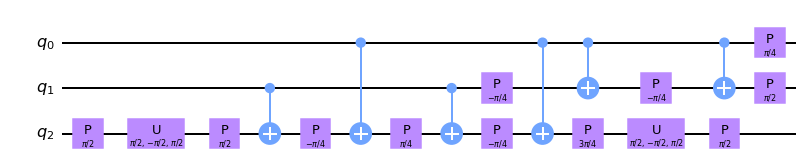

In [80]:
qc = QuantumCircuit(3)
qc2 = QuantumCircuit(3)
construct_toffoli(qc)
T2(qc2)
qc.draw("mpl")

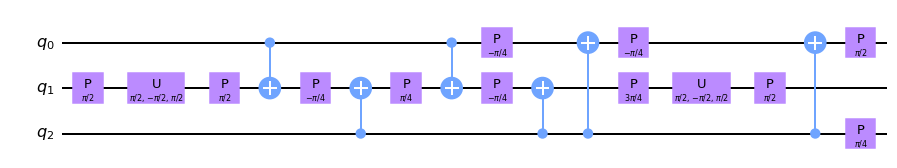

In [78]:
qc2.draw("mpl")

In [73]:
backend = Aer.get_backend("unitary_simulator")
job = execute(qc2, backend=backend)
unitary = job.result().get_unitary()

In [74]:
cor = qiskitU2textU(unitary)


In [75]:
cor

array([[ 1.00000000e+00+1.11022302e-16j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00-5.55111512e-17j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  1.00000000e+00+2.22044605e-16j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00-5.55111512e-17j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 1.23259516e-32+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         1.00000000e+00+5.55111512e-17j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  1.23259516e-32+0.00000000e+00j,
         0.00000000e+00+0.00000000e

In [85]:
def apply_CZ(qc, q0, q1):
    qc.u(0,0,pi/2,q0)
    qc.cx(q0,q1)
    qc.u(0,0,-pi/2,q1)
    qc.cx(q0,q1)
    qc.u(0,0,pi/2,q1)

In [86]:
qc = QuantumCircuit(2)
apply_CZ(qc,0,1)
qc.draw()

┌────────────┐                                       
q_0: ┤ U(0,0,π/2) ├──■───────────────────■────────────────
     └────────────┘┌─┴─┐┌─────────────┐┌─┴─┐┌────────────┐
q_1: ──────────────┤ X ├┤ U(0,0,-π/2) ├┤ X ├┤ U(0,0,π/2) ├
                   └───┘└─────────────┘└───┘└────────────┘